<h1><center>Box Plot</center></h1><br />

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter
from operator import add
# could also use holoview: http://holoviews.org/

In [2]:
list_csv_file = []
for i in range(270, 300):
    list_csv_file.append("Results_model_run%s.csv" % i)
list_dataframe = []
for filename in list_csv_file:
    list_dataframe.append(pd.read_csv(filename))
merged_dataframes = pd.concat(list_dataframe)
merged_dataframes['Cumulative PV capacity'] = (merged_dataframes['Total product']) / 1E9
merged_dataframes['Repaired eol PV modules'] = (merged_dataframes['eol - new repaired weight'] + 
                                 merged_dataframes['eol - used repaired weight']) / 1E9
merged_dataframes['Sold eol PV modules'] = (merged_dataframes['eol - new sold weight'] + 
                                 merged_dataframes['eol - used sold weight']) / 1E9
merged_dataframes['Recycled eol PV modules'] = (merged_dataframes['eol - new recycled weight'] + 
                                 merged_dataframes['eol - used recycled weight']) / 1E9 * 0.8036 # baseline=0.8036 
                                                                                                 # frelp=0.9685
merged_dataframes['Landfilled eol PV modules'] = (merged_dataframes['eol - new landfilled weight'] + 
                                 merged_dataframes['eol - used landfilled weight']) / 1E9 + (
    (1 - 0.8036) * merged_dataframes['Recycled eol PV modules']) # baseline=0.8036 frelp=0.9685
merged_dataframes['Stored eol PV modules'] = (merged_dataframes['eol - new stored weight'] + 
                                 merged_dataframes['eol - used stored weight']) / 1E9
merged_dataframes['Recycled'] = merged_dataframes['Recycled eol PV modules']
merged_dataframes['Repaired & reused'] = (merged_dataframes['Sold eol PV modules'] + 
                                 merged_dataframes['Repaired eol PV modules'])
merged_dataframes['CE pathways'] = merged_dataframes['Recycled'] + merged_dataframes['Repaired & reused']
merged_dataframes['Landfill & Storage'] = (merged_dataframes['Landfilled eol PV modules'] + 
                                           merged_dataframes['Stored eol PV modules'])
merged_dataframes['Recycled material value (million $)'] = merged_dataframes['Recycled material value'] / 1E6
merged_dataframes['Reuse & repair material value (million $)'] = (
    (merged_dataframes['End-of-life - repaired'] + merged_dataframes['End-of-life - sold'] * 
     -1 * merged_dataframes['Average selling cost']) / 1E6)
merged_dataframes['Circular material value (million $)'] = (
    merged_dataframes['Recycled material value (million $)'] + 
    merged_dataframes['Reuse & repair material value (million $)'])
merged_dataframes["volume_recycled"] = (merged_dataframes["eol - new recycled weight"] + 
                                        merged_dataframes["eol - used recycled weight"])
merged_dataframes['Cumulative modules'] = (
    merged_dataframes['End-of-life - recycled'] / 235.2)
merged_dataframes['Yearly modules'] = merged_dataframes[
    'Cumulative modules'].sub(merged_dataframes['Cumulative modules'].shift())
# Wp/module = 235.2 (considered constant), Frelp recovery revenue = 0.456647 $/kg, asu = 0.404126, baseline = 0.196257
merged_dataframes['Net income ($/module)'] = (-1 * merged_dataframes['Recycler costs'] / 
                                              merged_dataframes['Cumulative modules'])
merged_dataframes.loc[~np.isfinite(merged_dataframes['Net income ($/module)']), 'Net income ($/module)'] = 0
merged_dataframes = merged_dataframes.groupby(['Year']).mean()
merged_dataframes['Yearly modules'].iloc[0] = merged_dataframes['Cumulative modules'].iloc[0]
merged_dataframes['Net income ($/module)'].iloc[0] = 0
merged_dataframes['Net income'] = merged_dataframes['Yearly modules'] * merged_dataframes['Net income ($/module)']
merged_dataframes['Cumulative net income'] = merged_dataframes['Net income'].cumsum()
merged_dataframes = merged_dataframes.filter([
    'Year', 'Repaired eol PV modules', 'Sold eol PV modules', 'Recycled eol PV modules', 
    'Landfilled eol PV modules', 'Stored eol PV modules', 'Cumulative PV capacity', 
    'volume_recycled', 'Recycled material volume', 'Net income ($/module)', 
    'Cumulative modules', 'Yearly modules', 'Net income', 'Cumulative net income', 
    'Circular material value (million $)', 'Recycled material value (million $)', 
    'Reuse & repair material value (million $)'], axis=1)
merged_dataframes.to_csv("MergedData.csv")
#print(merged_dataframes['Cumulative net income (without recycling fee)'])

NameError: name 'pd' is not defined

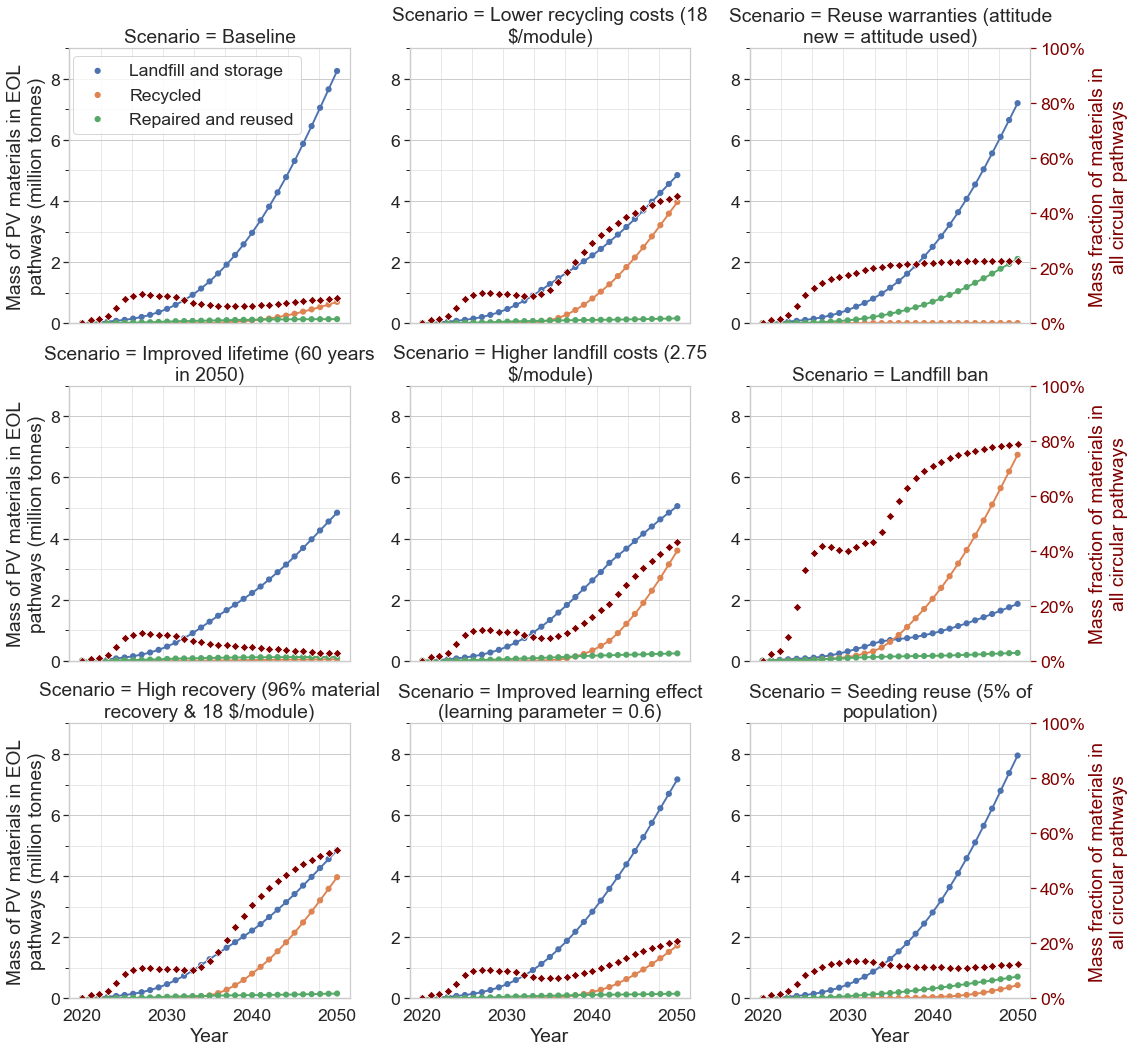

In [12]:
data_in = pd.read_csv("SmallMultiples_3metrics_v3.csv")
data_in2 = pd.read_csv("SmallMultiples_3metrics_v2.csv")
sns.set(style="whitegrid", font_scale=1.6, color_codes=True)
from pylab import rcParams
import matplotlib.ticker as mtick
import textwrap
import matplotlib as mpl
#print(data_in)
from textwrap import wrap
labels=['Mass of PV materials in EOL pathways (million tonnes)']
labels = [ '\n'.join(wrap(l, 30)) for l in labels ][0]
data_in[labels] = (
    data_in["Mass of PV materials in EOL pathways (million tonnes)"])
labels2=['Mass fraction of materials in all circular pathways']
labels2 = [ '\n'.join(wrap(l, 30)) for l in labels2 ][0]
data_in2[labels2] = (
    data_in2["Mass fraction of materials in all circular pathways"] * 100)
#data_in["Recycled"] = data_in["Recycled"] * 100
#data_in["Reused"] = data_in["Reused"] * 100
#data_in["Materials recovered (kg)"] = data_in["Materials recovered (kg)"]
#data_in["Value recovered ($)"] = data_in["Value recovered ($)"]

data_in['Scenario'] = data_in['Scenario'].str.wrap(27)
rcParams['figure.figsize'] = 8, 4
ax = sns.catplot(x="Year", y=labels, col="Scenario", hue='End-of-life pathway',
                 data=data_in, scale=0.7, kind="point", col_wrap=3, inner=None, legend=False)

for tick in ax.axes.flat:
    labels = tick.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        #print(i, l)
        if(i%10 != 0): labels[i] = '' # skip even labels
    tick.set_xticklabels(labels)
    #tick.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_ylabel('')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='upper left', bbox_to_anchor=(-2.445, 3.46), ncol=1)

count=0
for ax in ax.axes.flat:
    ax.set_ylim(0, 9)
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
    ax.get_xaxis().set_minor_locator(mpl.ticker.LinearLocator(10))
    ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
    count += 1
    ax2 = ax.twinx()
    sns.scatterplot(x=range(31), y=data_in2[labels2].iloc[
        31*(count-1):31*count],
        data=data_in2, color=['maroon'], marker="D")
    #plt.plot(2050, 50)
    #ax2.axes.get_xaxis().set_visible(False)
    if count != 3 and count != 6 and count != 9:
        ax2.axes.get_yaxis().set_visible(False)
    ax2.yaxis.label.set_color('maroon')
    ax2.tick_params(axis='y', colors='maroon')
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax2.set_ylim(0, 100)
    ax2.grid(False)
plt.savefig("figure10.2.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)

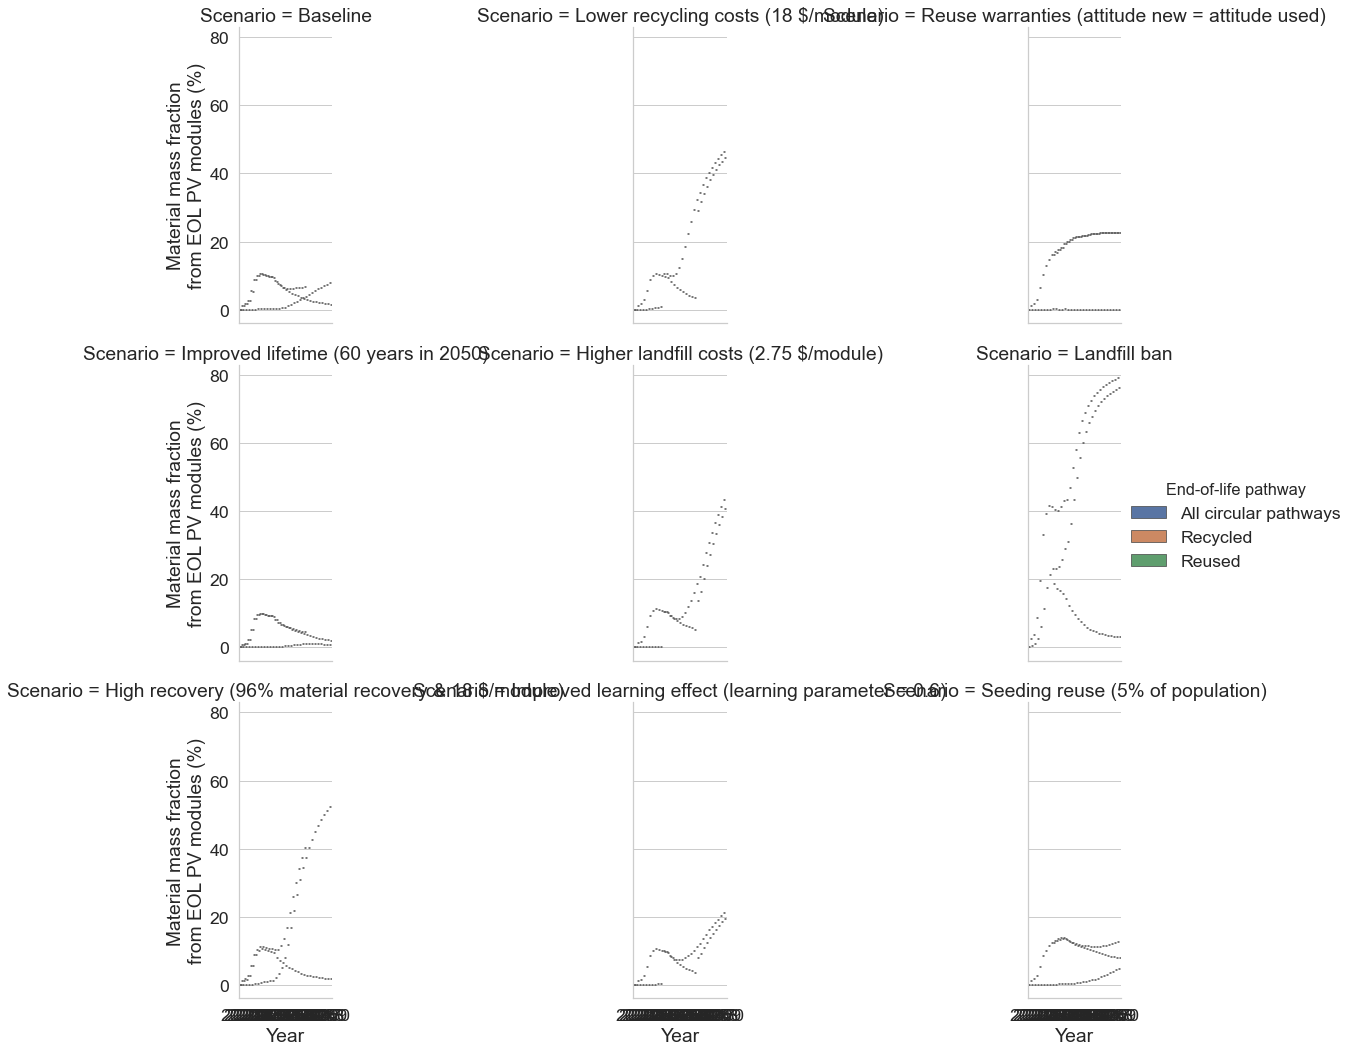

In [20]:
data_in = pd.read_csv("SmallMultiples_3metrics.csv")
sns.set(style="whitegrid", font_scale=1.6, color_codes=True)
from pylab import rcParams
import matplotlib.ticker as mtick
import textwrap
#print(data_in)
from textwrap import wrap
labels=['Material mass fraction from EOL PV modules (%)']
labels = [ '\n'.join(wrap(l, 25)) for l in labels ][0]
data_in[labels] = (
    data_in["Material mass fraction from EOL PV modules (%)"] * 100)
#data_in["Recycled"] = data_in["Recycled"] * 100
#data_in["Reused"] = data_in["Reused"] * 100
#data_in["Materials recovered (kg)"] = data_in["Materials recovered (kg)"]
#data_in["Value recovered ($)"] = data_in["Value recovered ($)"]

g = sns.catplot(x="Year", y=labels, kind="violin", col="Scenario", hue='End-of-life pathway',
                inner=None, data=data_in,  col_wrap=3)
#count=0
#for ax in g.axes.flat:
 #   count += 1
  #  if count == 3 or count == 6 or count == 9:
   #     ax.twinx()
#sns.swarmplot(x="Year", y=labels, color="k", col="Scenario", hue='End-of-life pathway',
 #             size=3, data=data_in, ax=g.axes)